# Import the libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['figure.dpi'] = 100
sns.set_style('darkgrid')
%matplotlib inline

# Load data

In [42]:
df = pd.read_csv('Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


## Data Cleaning and Preparation

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [47]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [49]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [51]:
df.shape

(2126, 14)

In [53]:
df.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Length: 2126, dtype: bool

In [55]:
df.duplicated().sum()

2

In [57]:
df.drop_duplicates(inplace=True)

In [59]:
df.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [61]:
for i in df.isna().sum():
    print(round(i/len(df)*100,2),'%')

0.99 %
0.94 %
0.0 %
0.0 %
0.0 %
0.99 %
0.99 %
0.0 %
0.0 %
0.0 %
0.99 %
0.99 %
0.99 %
0.99 %


In [62]:
# droping the rows because only 0.99% null values present in the data.

In [65]:
df.dropna(inplace=True)

In [67]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


## Statistical Summary

In [70]:
summary = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Standard Deviation': df.std(),
    'IQR': df.quantile(0.75) - df.quantile(0.25)
})

In [72]:
summary

,Mean,Median,Standard Deviation,IQR
LB,133.342023,133.000000,11.268266,14.000000
AC,0.003203,0.001631,0.004325,0.005650
FM,0.009973,0.000000,0.067902,0.002559
UC,0.004391,0.004484,0.003350,0.004705
DL,0.001894,0.000000,0.003349,0.003295
DS,0.000003,0.000000,0.000142,0.000000
DP,0.000175,0.000000,0.000840,0.000000
ASTV,47.013569,49.000000,18.846186,29.000000
MSTV,1.360968,1.200000,1.173620,1.000000
ALTV,10.363493,0.000000,21.289827,11.000000


In [74]:
'''
we can see right skewness and left skewness and slightly normal distribution in some of the cases
as we known, if mean is equal to median then it would be normal distribution
but if mean is greater than median then it is right skewness which also known as positively skewed
and if median is greater than mean then it is left skewness which also known as negatively skewed
'''

'\nwe can see right skewness and left skewness and slightly normal distribution in some of the cases\nas we known, if mean is equal to median then it would be normal distribution\nbut if mean is greater than median then it is right skewness which also known as positively skewed\nand if median is greater than mean then it is left skewness which also known as negatively skewed\n'

## Data Visualization

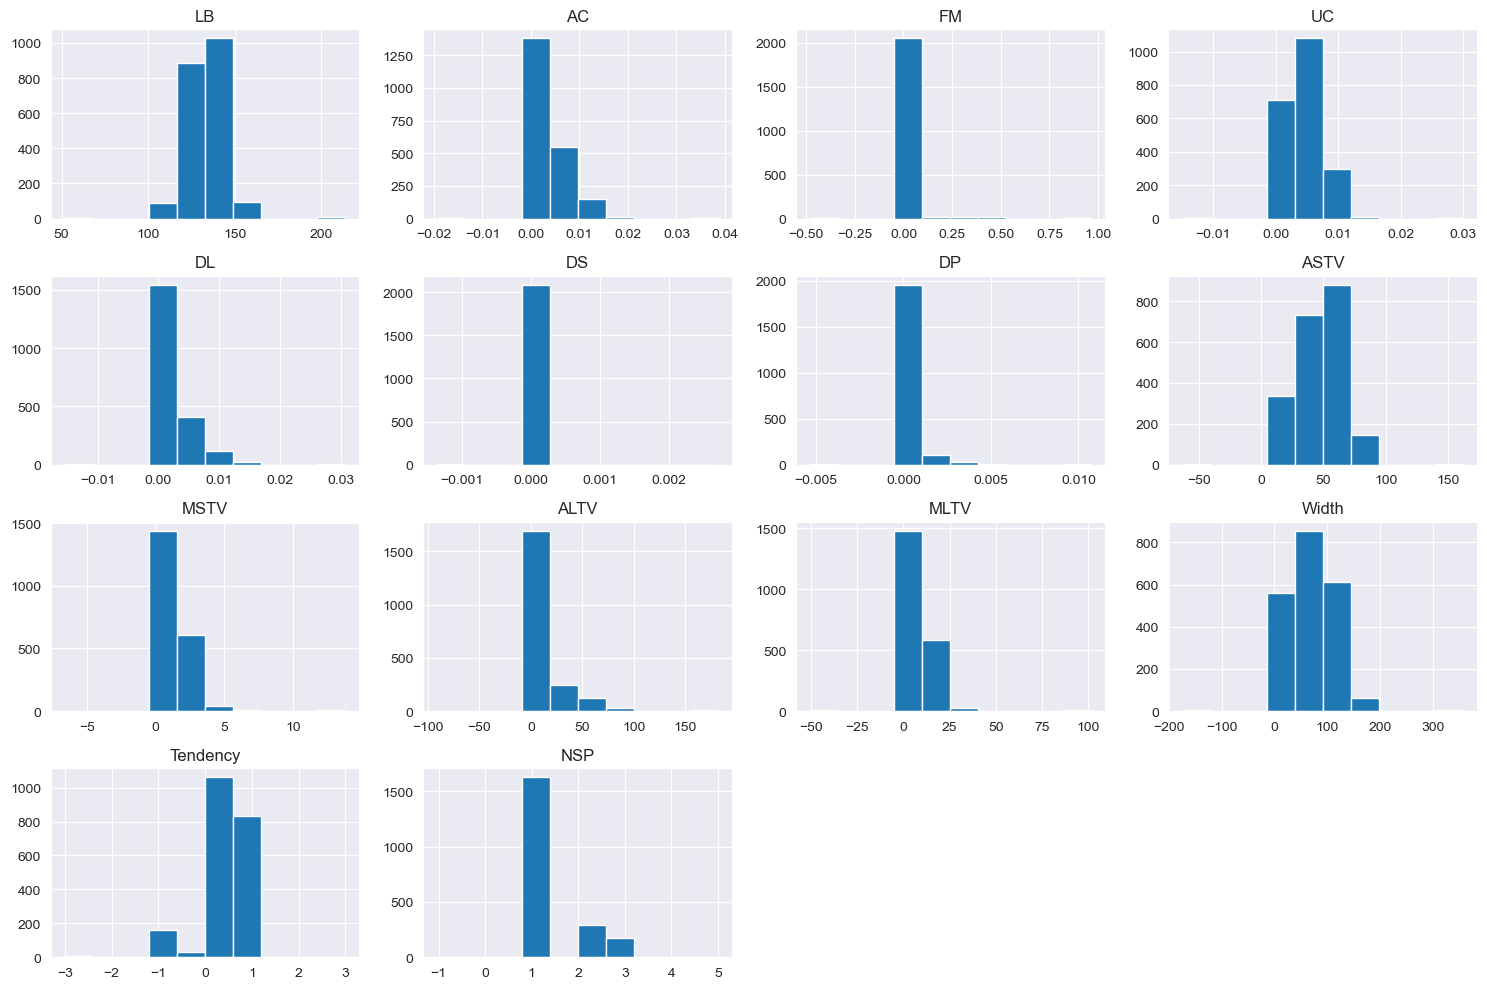

In [102]:
df.hist()
plt.tight_layout()
plt.show()

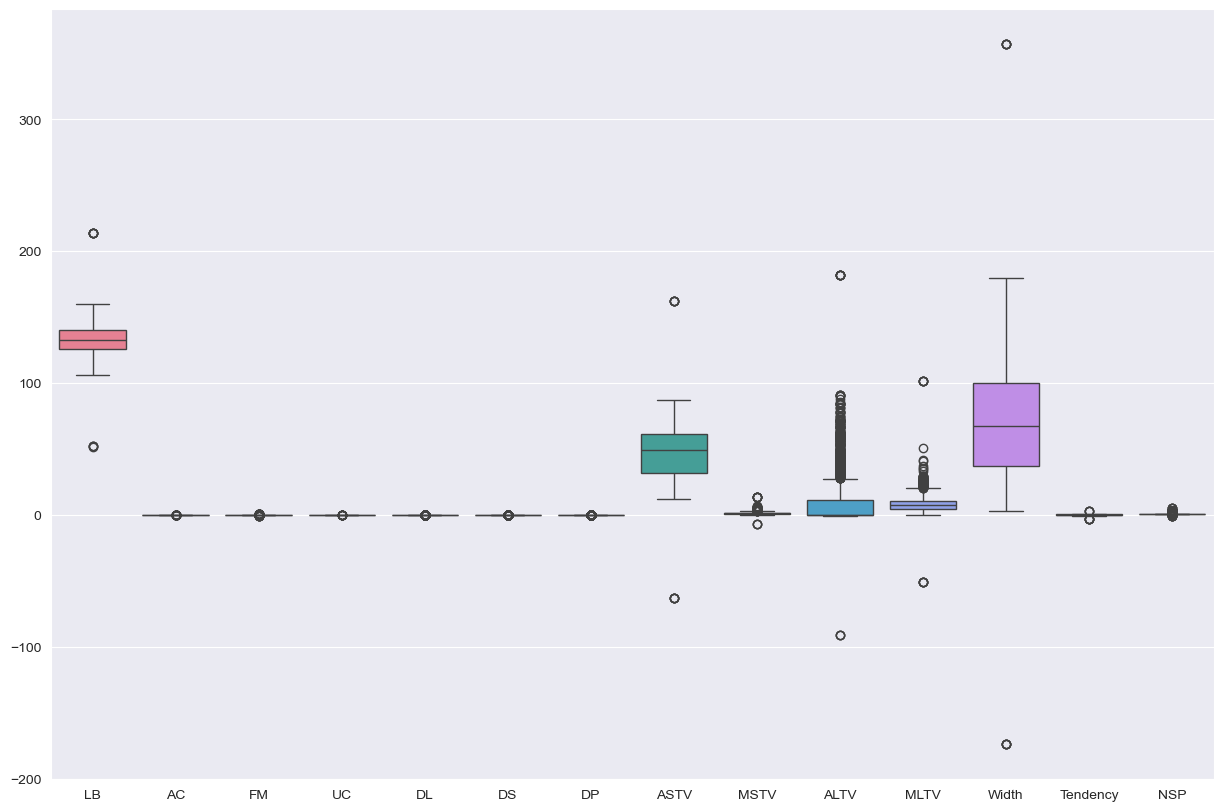

In [104]:
sns.boxplot(df)
plt.show() 

In [ ]:
# We can clearly see in the heatmap above that there are outliers present both above and below the extremes.

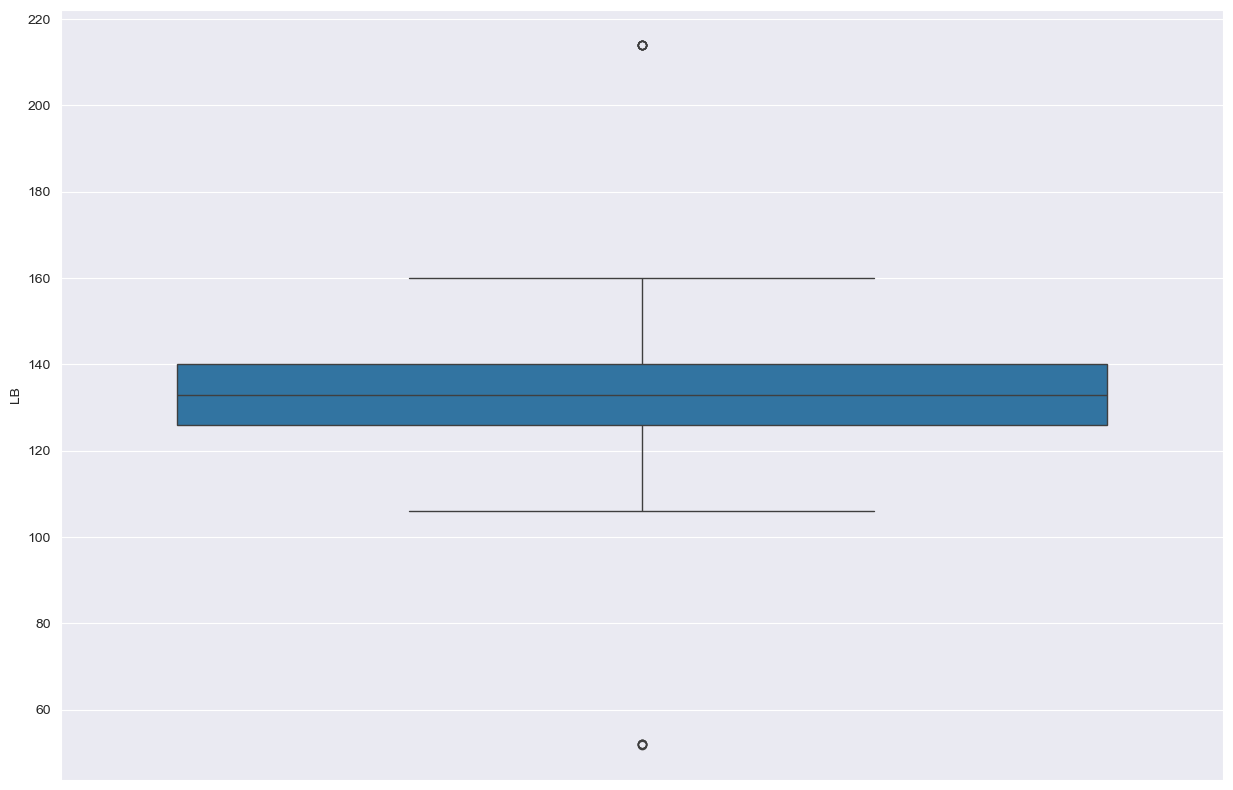

In [108]:
sns.boxplot(df['LB'])
plt.show()

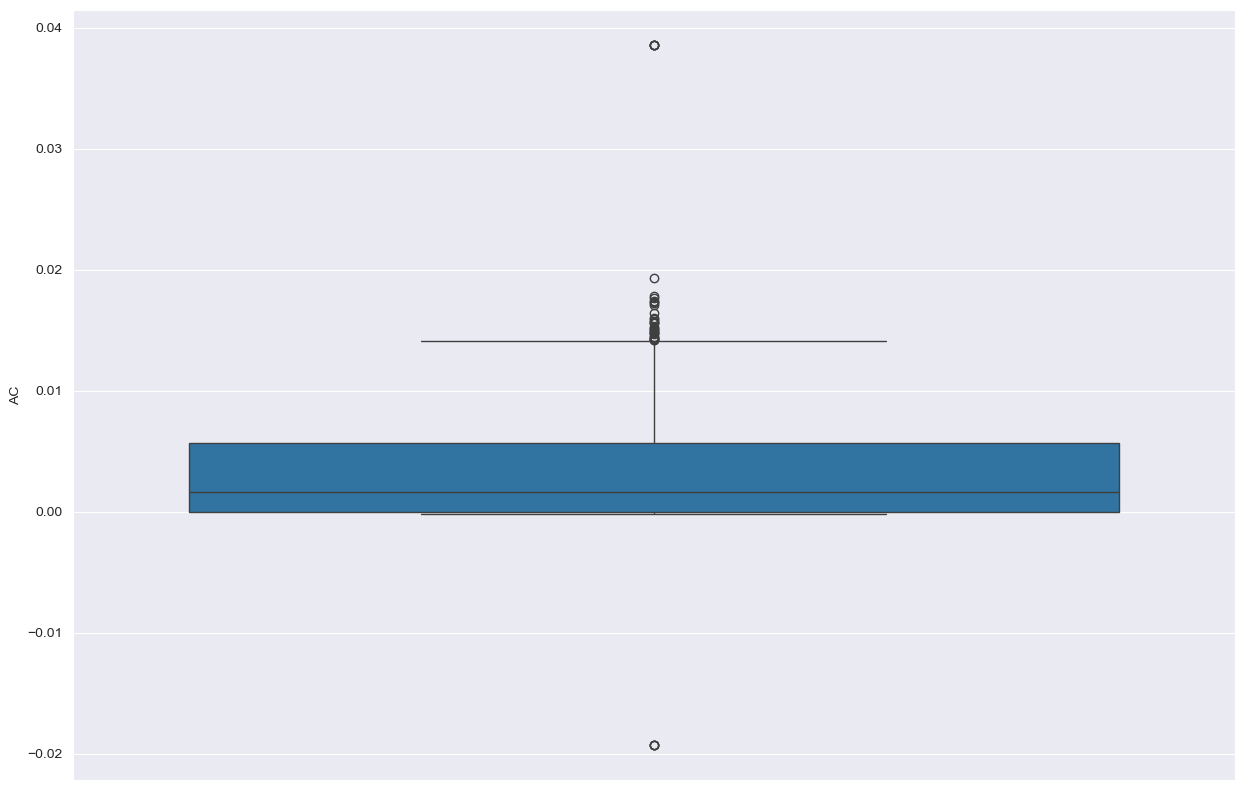

In [110]:
sns.boxplot(df['AC'])
plt.show()

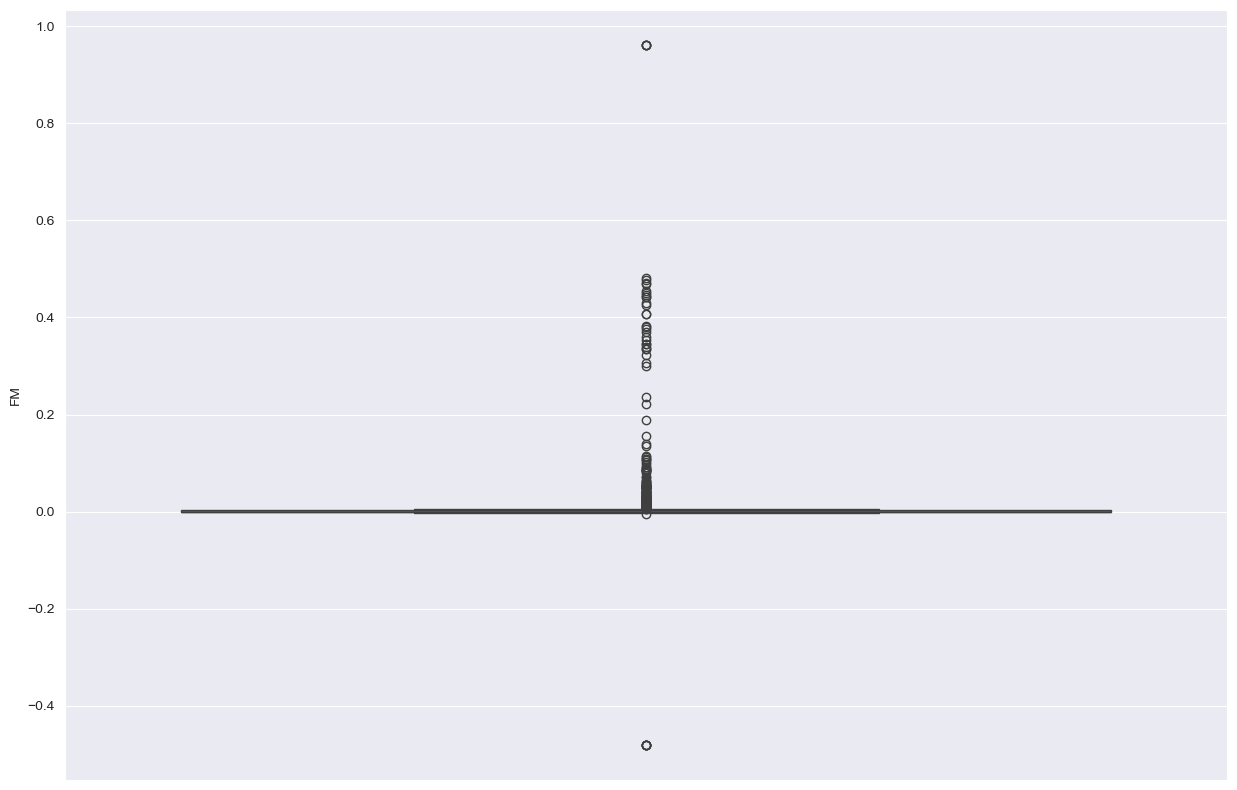

In [112]:
sns.boxplot(df['FM'])
plt.show()

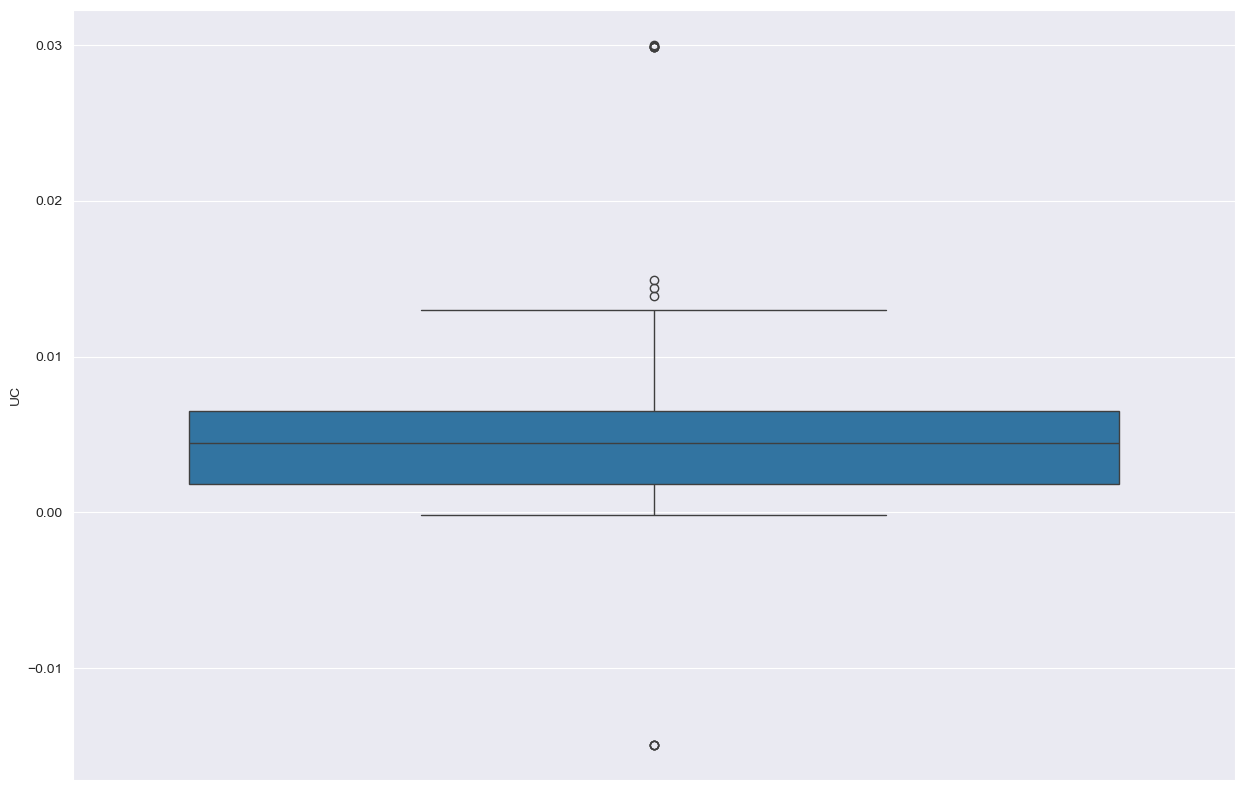

In [114]:
sns.boxplot(df['UC'])
plt.show()

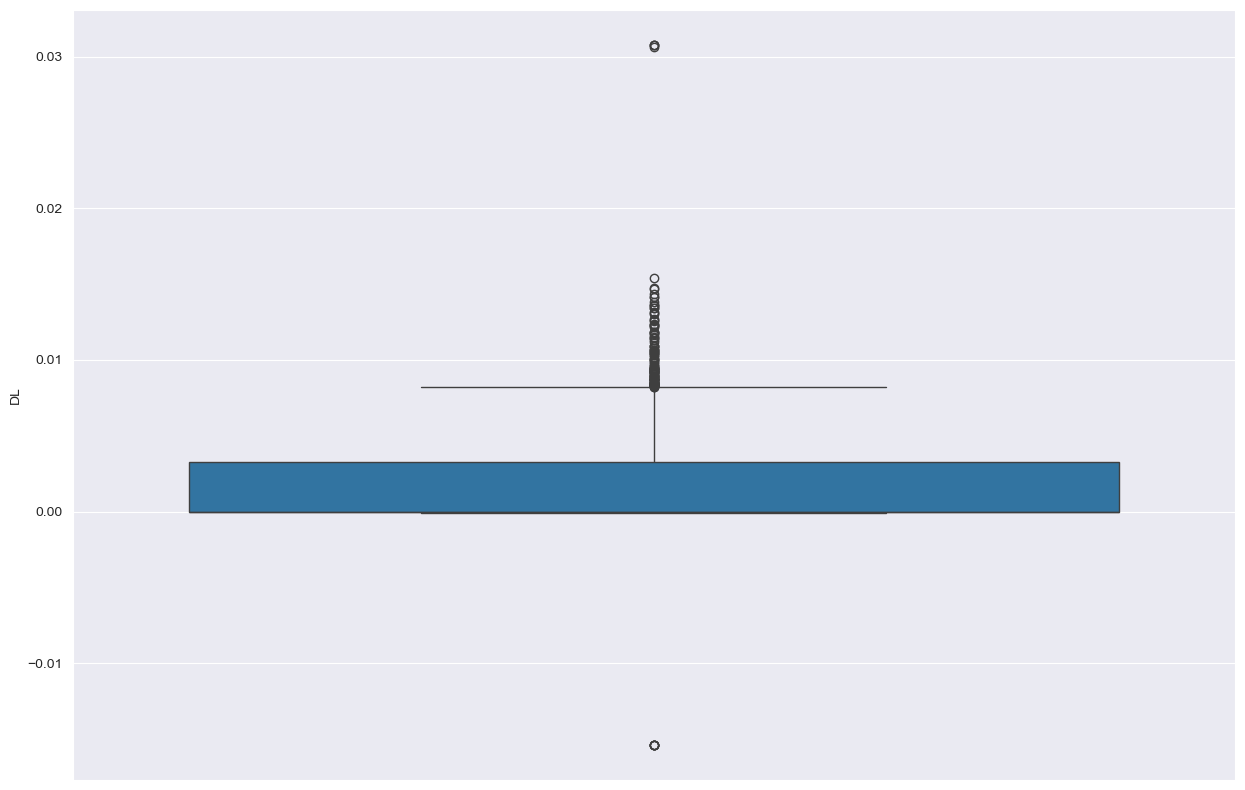

In [116]:
sns.boxplot(df['DL'])
plt.show()

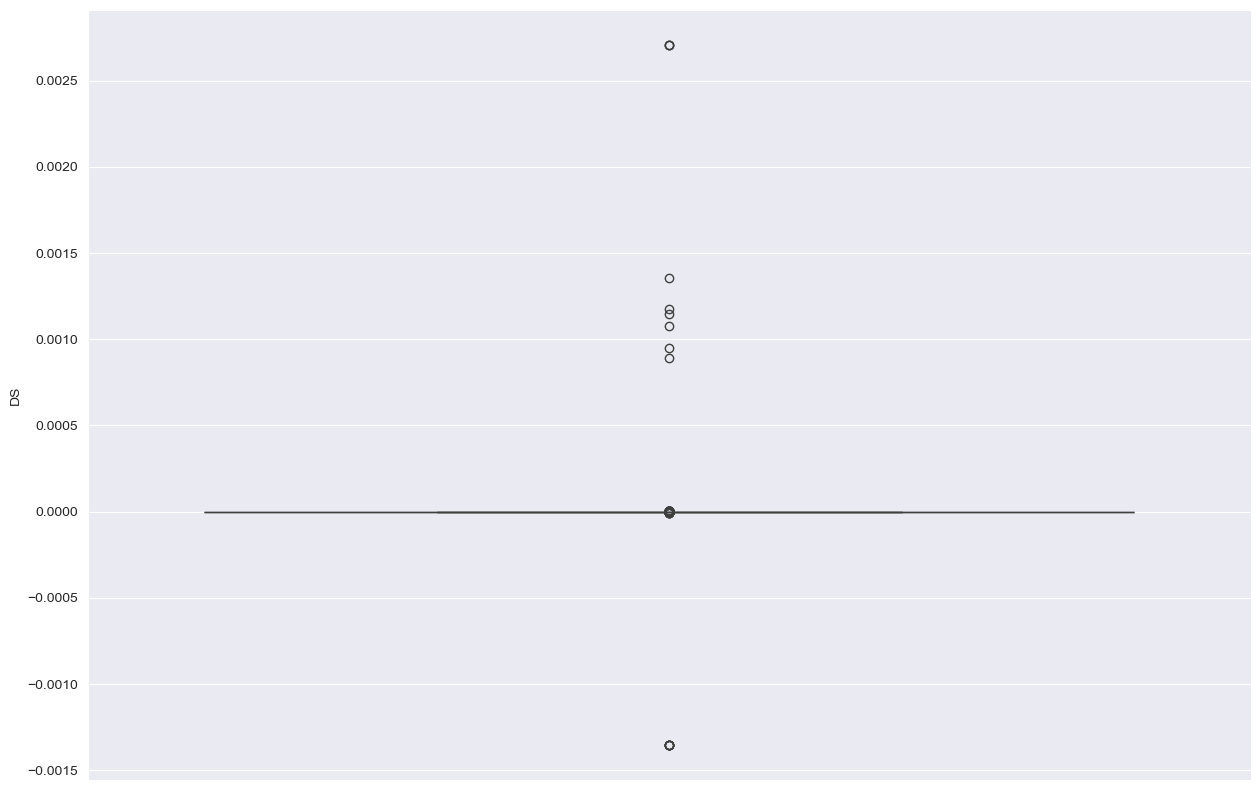

In [118]:
sns.boxplot(df['DS'])
plt.show()

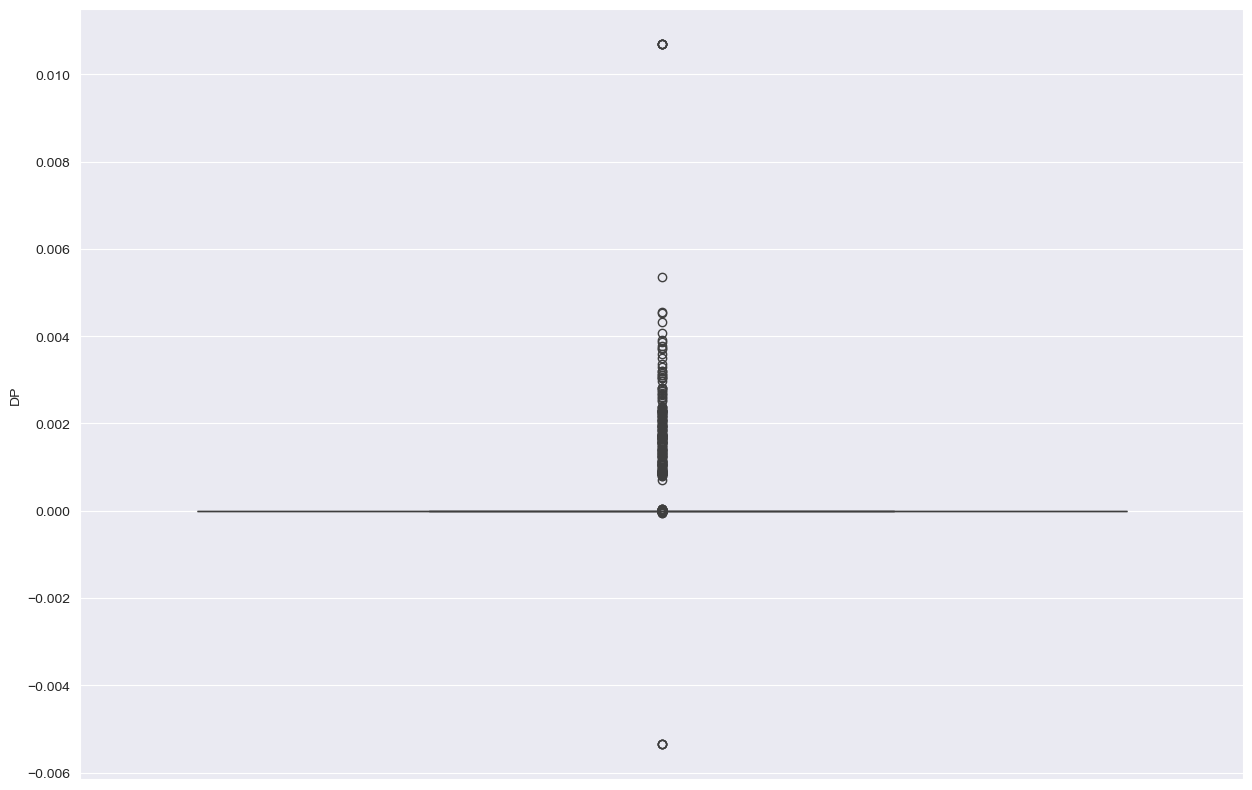

In [119]:
sns.boxplot(df['DP'])
plt.show()

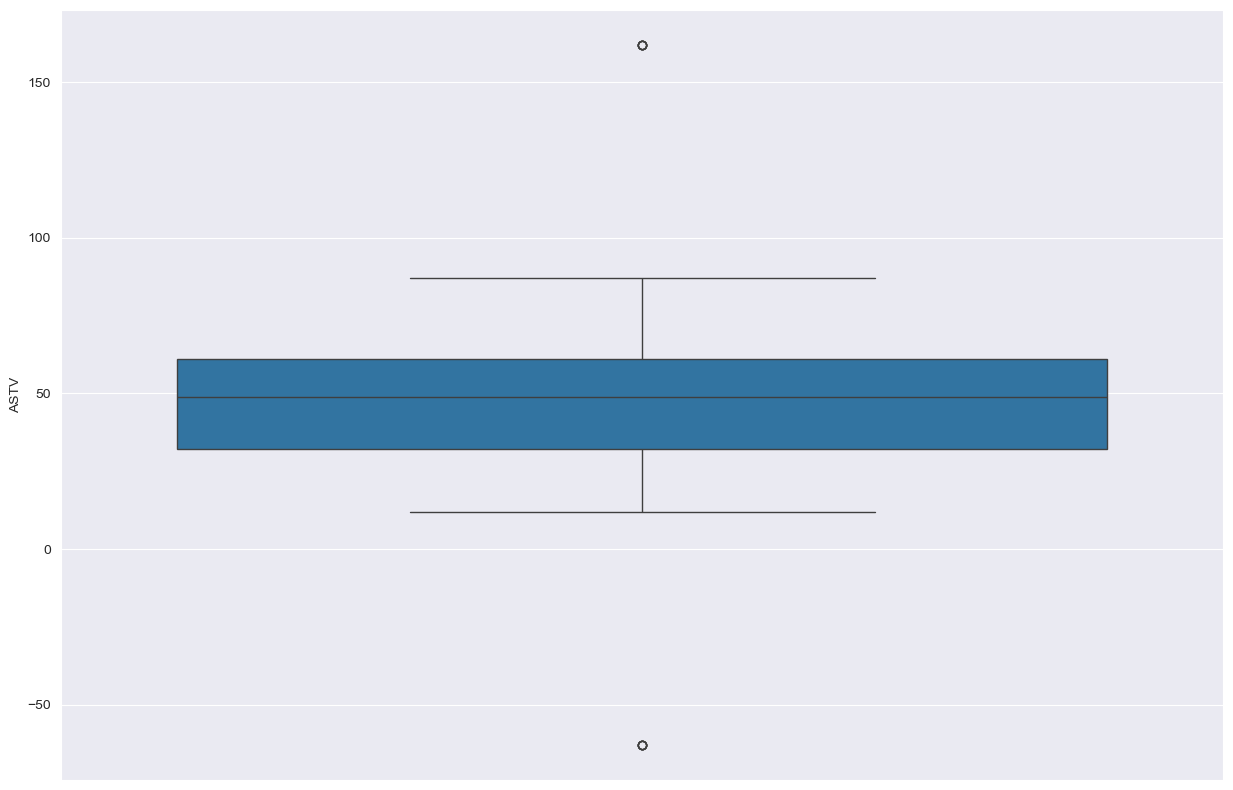

In [122]:
sns.boxplot(df['ASTV'])
plt.show()

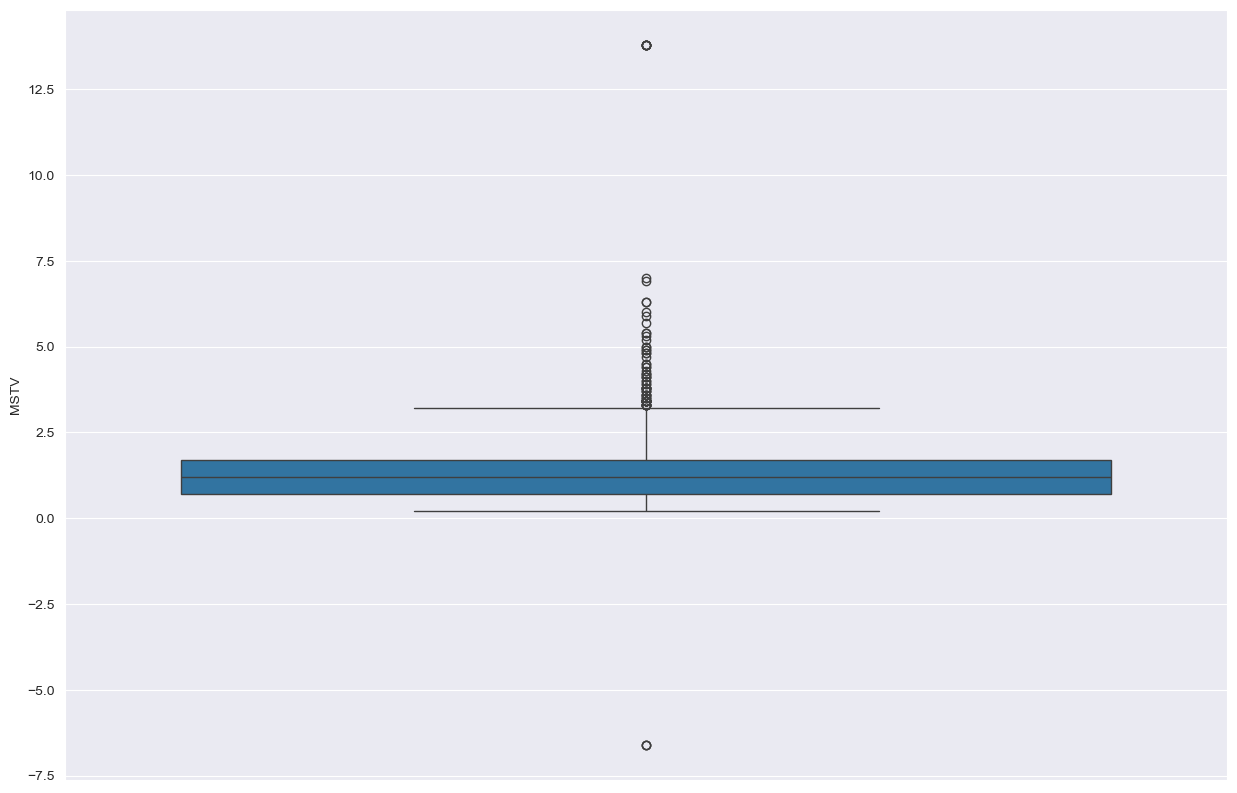

In [124]:
sns.boxplot(df['MSTV'])
plt.show()

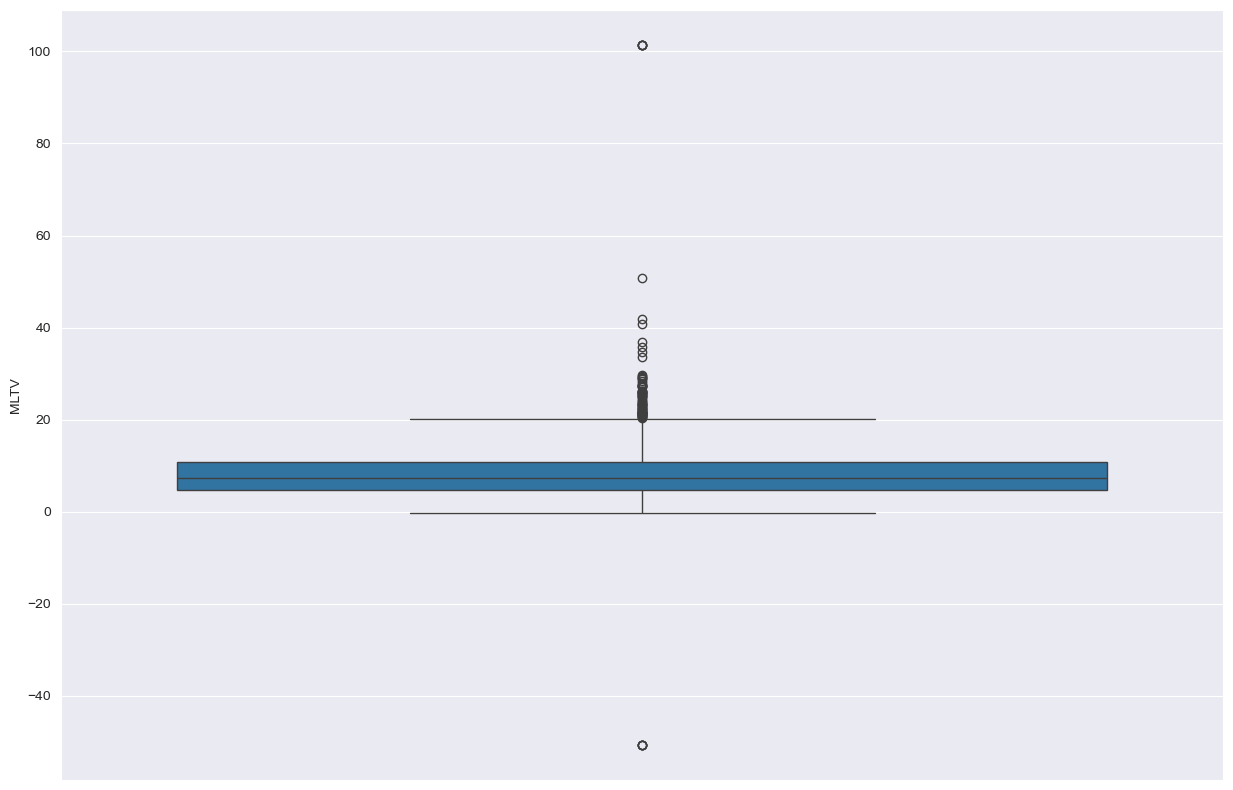

In [125]:
sns.boxplot(df['MLTV'])
plt.show()

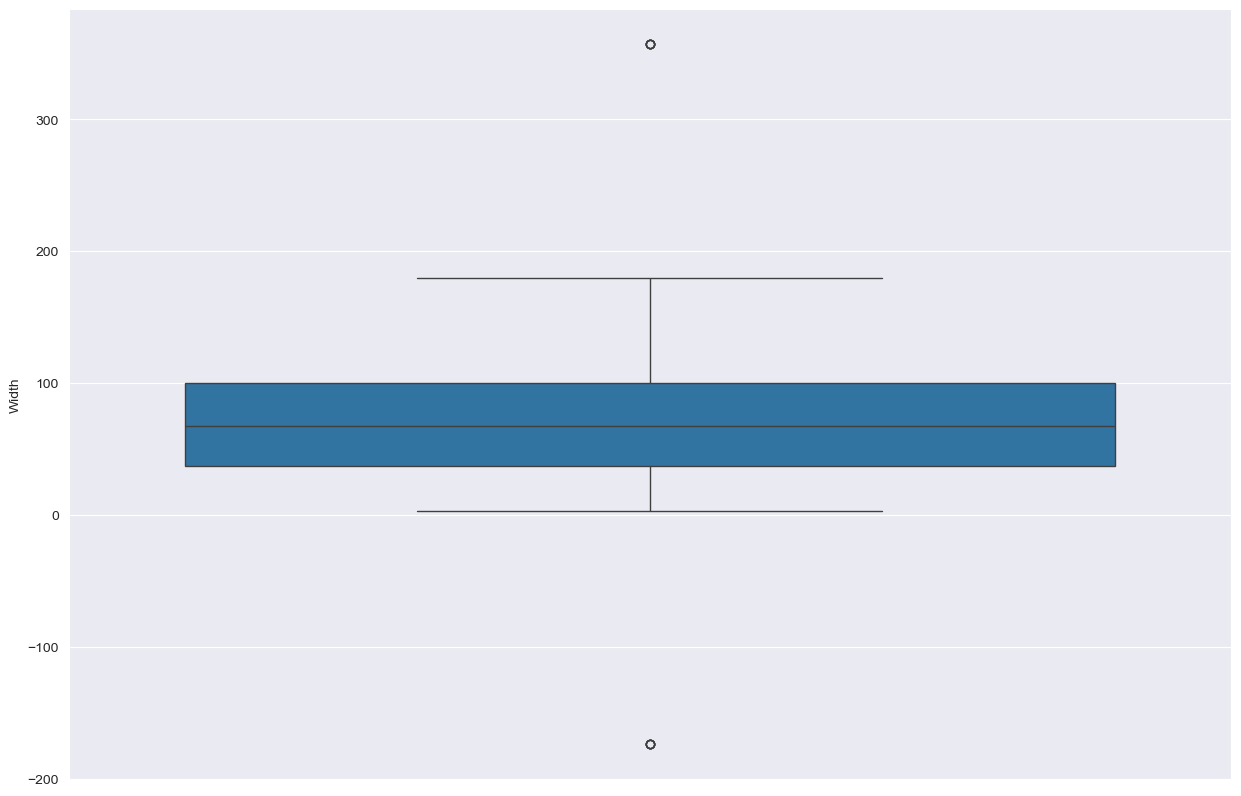

In [128]:
sns.boxplot(df['Width'])
plt.show()

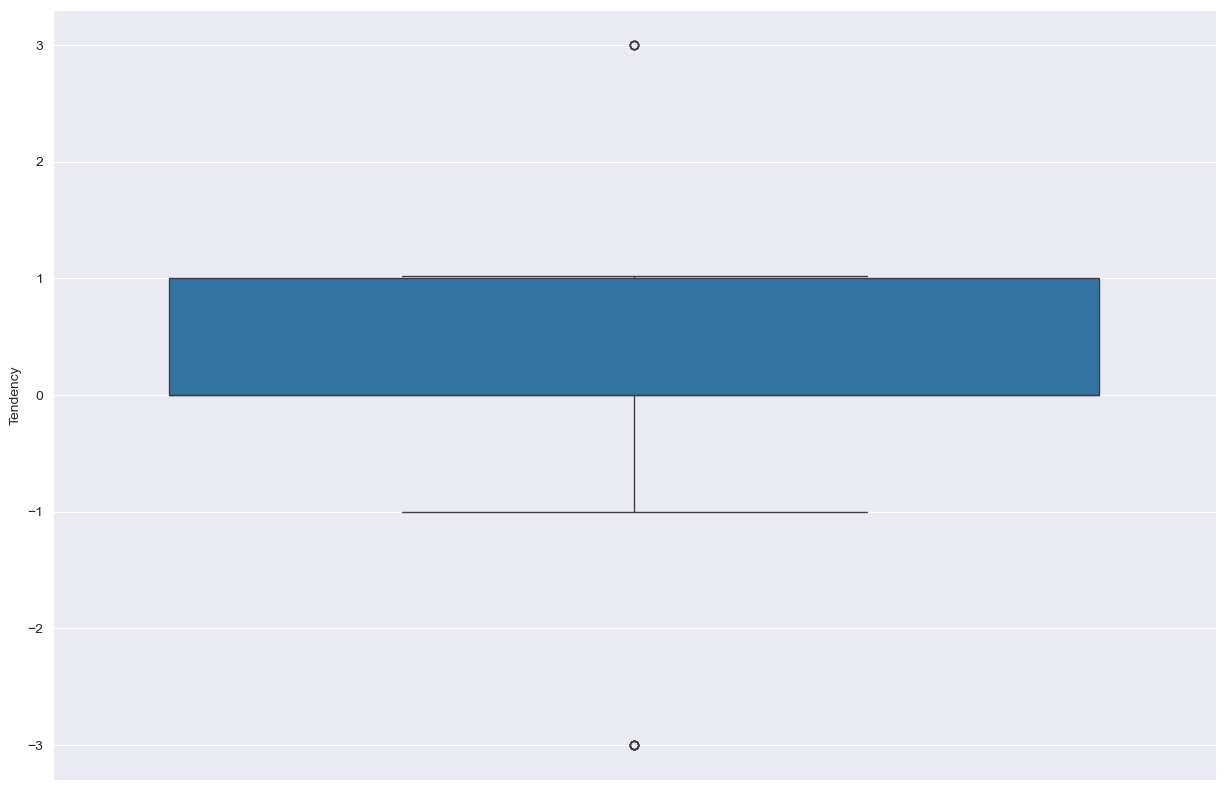

In [130]:
sns.boxplot(df['Tendency'])
plt.show()

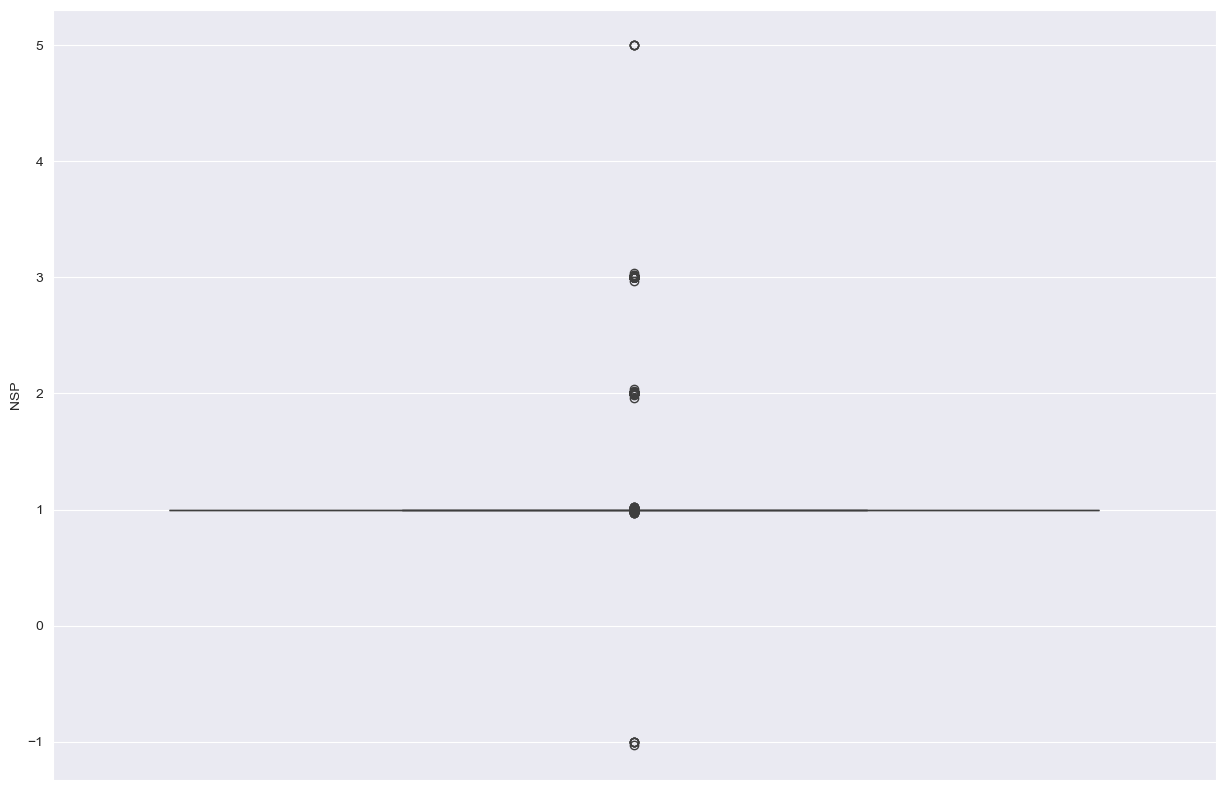

In [132]:
sns.boxplot(df['NSP'])
plt.show()

In [ ]:
# I also looked at each column separately using boxplots to better understand the data..

In [134]:
# Outliers treat
# Not treating outliers because it is medical data and in this outliers plays very important role..

In [136]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [138]:
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.064452,0.018810,-0.167012,-0.126981,-0.005439,-0.047726,0.242435,-0.170134,0.210955,-0.003225,-0.118375,0.237112,0.132008
AC,-0.064452,1.000000,0.010127,0.069820,-0.095626,-0.033632,-0.084644,-0.231114,0.127010,-0.274055,-0.106308,0.238422,0.032399,-0.317113
FM,0.018810,0.010127,1.000000,-0.053139,0.009753,0.029899,0.121259,-0.032931,0.017488,-0.012345,-0.006157,0.097133,-0.018410,0.073997
UC,-0.167012,0.069820,-0.053139,1.000000,0.191473,-0.006957,0.070504,-0.182358,0.190295,-0.228399,-0.048862,0.106787,-0.067098,-0.185953
DL,-0.126981,-0.095626,0.009753,0.191473,1.000000,0.058625,0.145338,-0.071342,0.410270,-0.186882,-0.165494,0.409793,-0.023838,0.025179
DS,-0.005439,-0.033632,0.029899,-0.006957,0.058625,1.000000,0.004282,0.008441,0.016165,-0.004406,0.034366,0.040831,-0.015408,0.065399
DP,-0.047726,-0.084644,0.121259,0.070504,0.145338,0.004282,1.000000,0.038076,0.119911,-0.077865,-0.113993,0.175240,-0.130510,0.294416
ASTV,0.242435,-0.231114,-0.032931,-0.182358,-0.071342,0.008441,0.038076,1.000000,-0.293322,0.357478,-0.219922,-0.208439,-0.011367,0.422515
MSTV,-0.170134,0.127010,0.017488,0.190295,0.410270,0.016165,0.119911,-0.293322,1.000000,-0.291405,0.028807,0.435563,-0.036849,-0.095143
ALTV,0.210955,-0.274055,-0.012345,-0.228399,-0.186882,-0.004406,-0.077865,0.357478,-0.291405,1.000000,-0.107475,-0.346960,0.036552,0.365708


In [140]:
'''
+1 indicates high correlated but in positive side
-1 indicates high correlated but in negative side 
0 indicates low correlated
'''

'\n+1 indicates high correlated but in positive side\n-1 indicates high correlated but in negative side \n0 indicates low correlated\n'

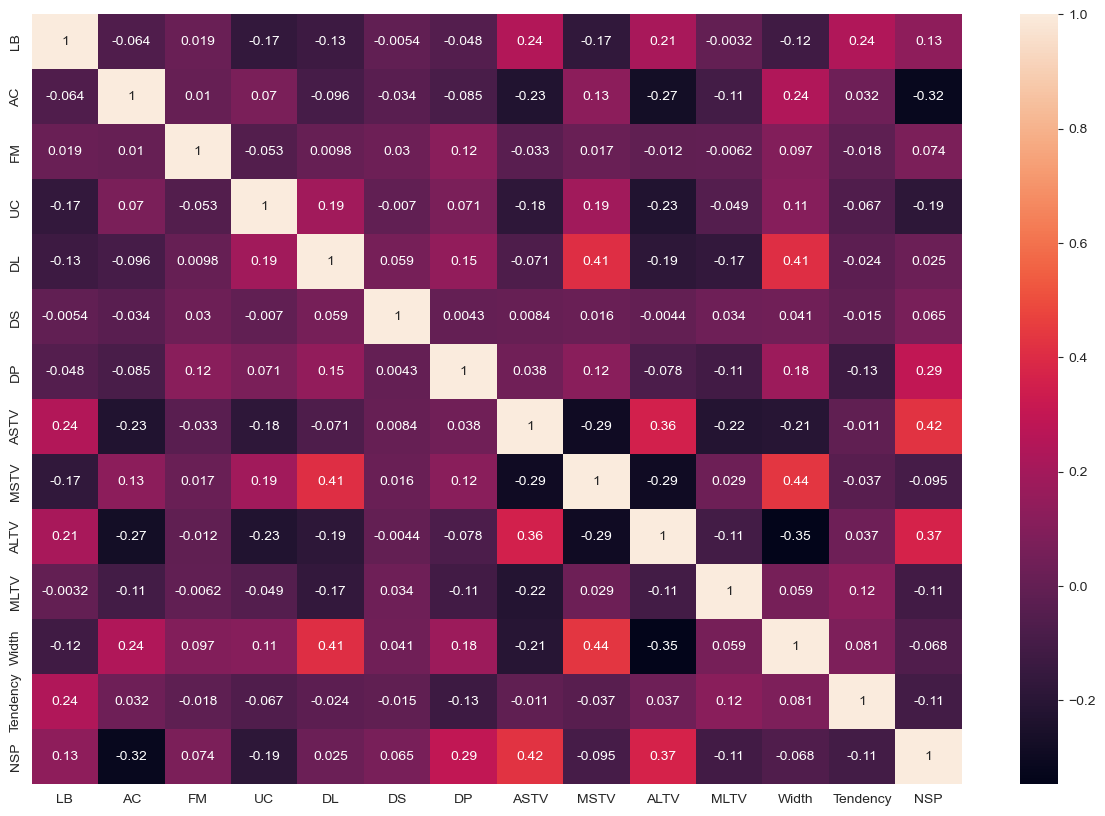

In [142]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [147]:
# High correlation indicates the lighter color and low correlation indicates the darker color..

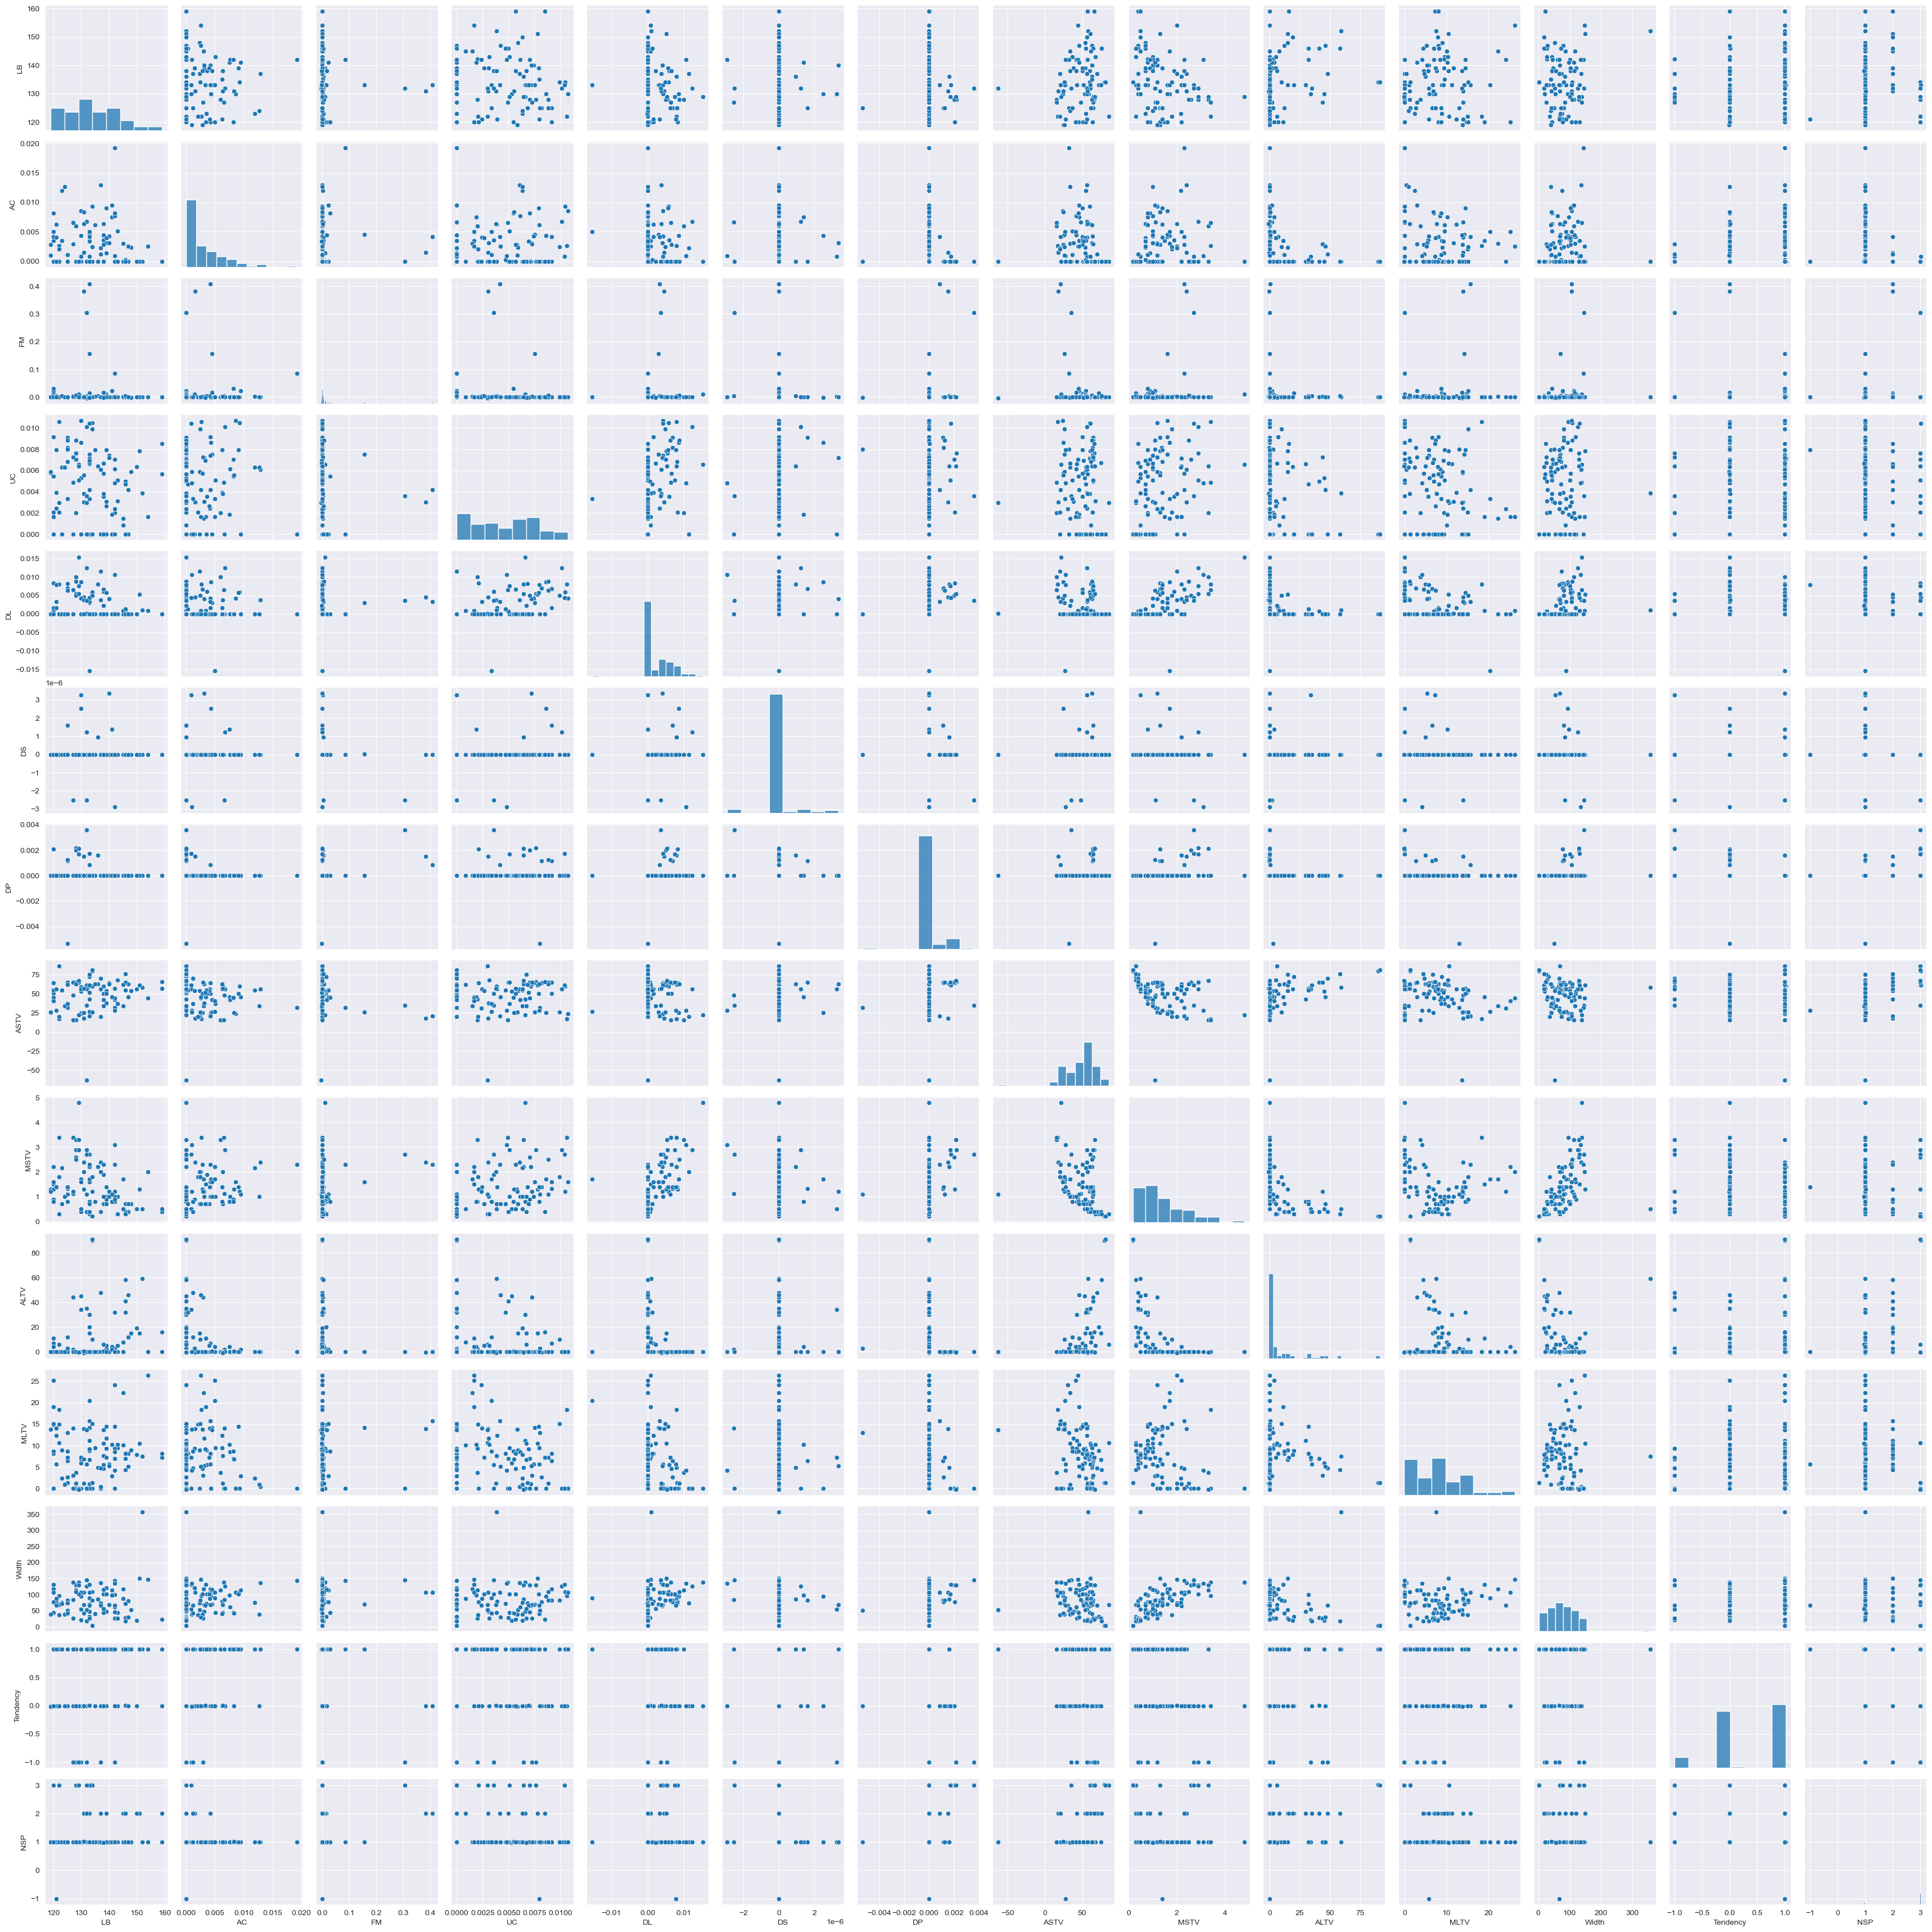

In [146]:
sns.pairplot(df.sample(100)) 
plt.show()

In [ ]:
# In pairplot each scatter plot shows how two variables relate.. 
# We can see that clear upward trend that indicated two variables are positively correlated...

# Conclusion

In [ ]:
'''I have worked with medical data (cardiographic data) that includes continuous variables and all the important columns.
I performed data cleaning and detected outliers.
However, I did not treat or remove the outliers because this is medical data, and in domains like healthcare or banking, outliers can be very important.
In medical data, outliers are often not errors, but indicators of serious health conditions.'''

In [ ]:
'I also looked at each column separately using boxplots to better understand the data.'

In [ ]:
'''After that, I worked on the visualization part, including a heatmap that shows both high and low correlations between some columns.
In the heatmap, darker colors indicates low correlation and lighter color shows high correlation.
'''